In [7]:
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval (x) if pd.notna(x) else x)

In [8]:
salary_cols = ['salary_year_avg', 'salary_hour_avg', 'salary_rate']

df.loc[:, salary_cols] = df.loc[:, salary_cols].replace('missing', pd.NA)
df.loc[:, salary_cols] = df.loc[:, salary_cols].apply(pd.to_numeric, errors='coerce')

df_DA_IND = df[(df['job_country']=='India') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_IND['job_location'] = df_DA_IND['job_location'].str.replace(', India', '')
df_DA_IND['job_location'] = df_DA_IND['job_location'].replace('India','Anywhere')
df_DA_IND

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,Anywhere,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,NaN,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,NaN,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,NaN,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,NaN,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,Anywhere,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,NaN,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,NaN,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,NaN,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,NaN,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,NaN,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


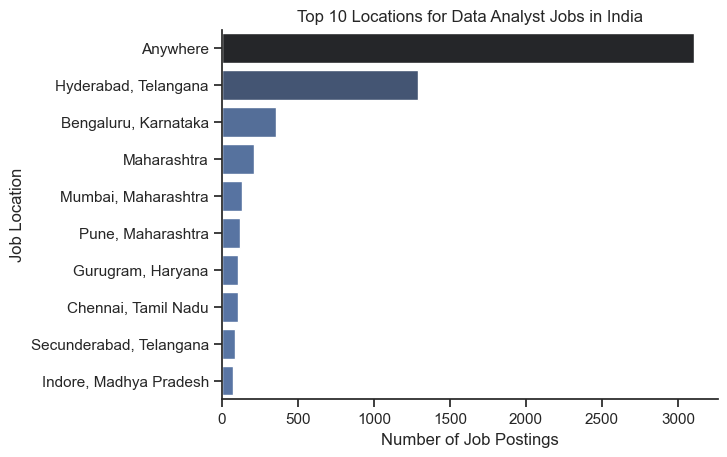

In [18]:
df_plot = df_DA_IND['job_location'].value_counts().head(10).to_frame('count').reset_index()

sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x='count', y='job_location',hue = 'count', palette = 'dark:b_r',legend = False)
sns.despine()
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Location')
plt.title('Top 10 Locations for Data Analyst Jobs in India')
plt.show()


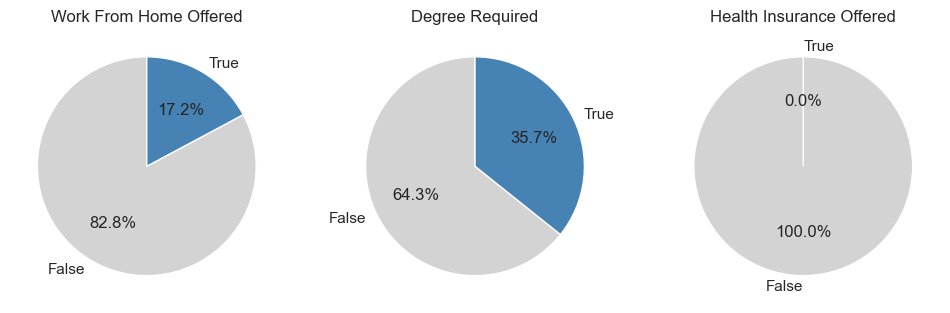

In [24]:
dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health Insurance Offered',

}

fig, ax = plt.subplots(1, 3)

fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_IND[column].value_counts(dropna=False).reindex([False, True], fill_value=0)
    counts = counts.reindex([False, True], fill_value=0)
    # ...existing code...
    ax[i].pie(counts.values, labels=['False', 'True'], autopct='%1.1f%%', colors=['lightgrey','steelblue'], startangle=90)
# ...existing code...
    ax[i].set_title(title)

plt.show()

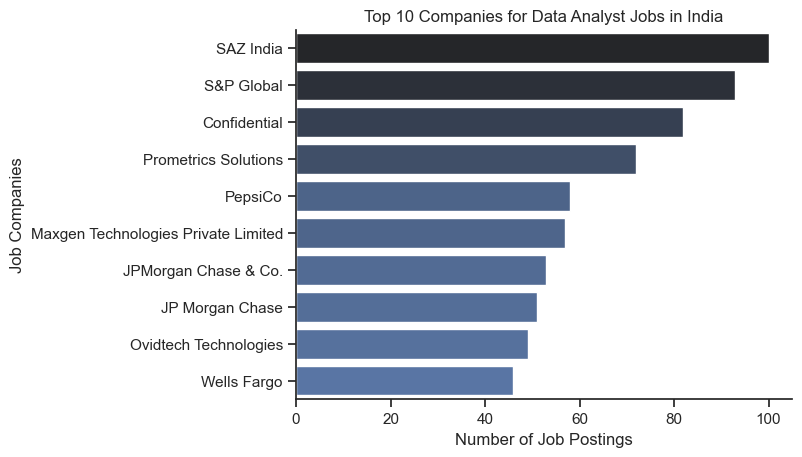

In [25]:
df_plot = df_DA_IND['company_name'].value_counts().head(10).to_frame('count').reset_index()

sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x='count', y='company_name',hue = 'count', palette = 'dark:b_r',legend = False)
sns.despine()
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Companies')
plt.title('Top 10 Companies for Data Analyst Jobs in India')
plt.show()